# Classificação Urband Sound

## Projeto - Aprendizagem Computacional

### Iara Silva e Mariana Serrão

# Introducao

Neste projeto, realizou-se uma análise aprofundada ao conjunto de dados urbansound8k, que consiste em 8732 faixas de som rotulados, cada um com duração inferior ou igual a 4 segundos. Este conjunto de dados acústicos abrange uma variedade de sons urbanos e é classificado em 10 classes distintas, sendo elas: ar condicionado, buzina de carro, crianças brincando, latido de cão, perfuração (barulho de broca), motor ocioso, disparo de arma, martelo pneumático (jackhammer), sirene e música de rua.

O objetivo do trabalho é a implementação de classificadores baseados em deep learning, com o objetivo de determinar a qual das classes mencionadas uma determinada faixa de som, não observada anteriormente, pertence. Este desafio envolve a exploração das características sonoras presentes nas faixas e a criação de modelos capazes de interpretar e categorizar esses sons de maneira eficaz.

## Import Data

O bloco de código seguinte utiliza a biblioteca soundata para importar o conjunto de dados urbansound8k. Após inicializar e realizar o download do conjunto de dados, é feita a validação para garantir a integridade dos arquivos. Em seguida, uma faixa de exemplo é escolhida aleatoriamente, exibindo informações sobre o arquivo, como nome, classe e duração.

_Correr o bloco de código seguinte apenas se for a primeira vez a fazer download do dataset_

In [1]:
'''import soundata

dataset = soundata.initialize('urbansound8k')
dataset.download()  # download the dataset
dataset.validate()  # validate that all the expected files are there

example_clip = dataset.choice_clip()  # choose a random example clip
print(example_clip)  # see the available data
'''

"import soundata\n\ndataset = soundata.initialize('urbansound8k')\ndataset.download()  # download the dataset\ndataset.validate()  # validate that all the expected files are there\n\nexample_clip = dataset.choice_clip()  # choose a random example clip\nprint(example_clip)  # see the available data\n"

## Pré-processamento e preparação dos dados

In [1]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("C:/tmp/sound_datasets/urbansound8k/metadata/UrbanSound8K.csv")

In [4]:
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [2]:
import os
import librosa
import librosa.display
import glob 
import skimage

C:\Users\beatr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


SystemError: initialization of _internal failed without raising an exception

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fsID,8732.0,116033.493816,57991.017218,344.000000,69942.250000,118279.000000,166942.000000,209992.000000
start,8732.0,38.645409,74.292126,0.000000,3.000000,10.376492,35.131372,600.125356
end,8732.0,42.253312,74.369669,0.105962,6.839398,14.000000,38.866979,604.125356
salience,8732.0,1.347000,0.476043,1.000000,1.000000,1.000000,2.000000,2.000000
fold,8732.0,5.385937,2.846820,1.000000,3.000000,5.000000,8.000000,10.000000
classID,8732.0,4.592877,2.894544,0.000000,2.000000,4.000000,7.000000,9.000000


In [8]:
#classes nao balanceadas
df['class'].value_counts()


dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

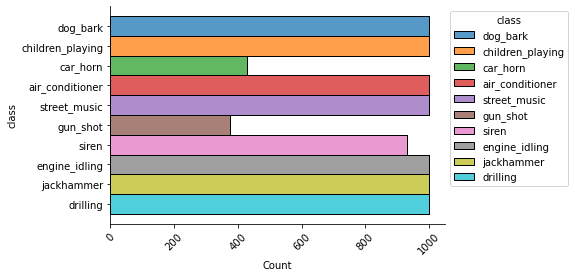

In [9]:
#ver graficamente
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
ax = sns.histplot(y='class',data = df, hue="class", multiple="stack")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45);
sns.despine()
plt.show()

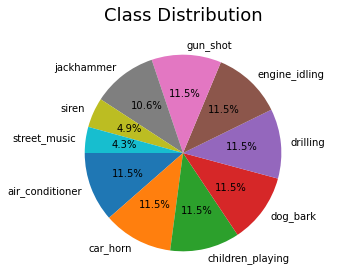

In [10]:
class_dict = df['class'].value_counts(normalize=True)
classes = list(np.unique(df['class']))
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08, fontsize=18)
ax.pie(class_dict, labels=classes, autopct='%1.1f%%', shadow=False, startangle=180)
ax.axis('equal')
plt.savefig("distribution_class")
plt.show(block=False)

In [11]:
dif1=df['end'].iloc[0]-df['start'].iloc[0]
dif2=df['end'].iloc[1]-df['start'].iloc[1]
print(dif1)
print(dif2)


0.317551
4.0


### Verificação da existência de diferentes durações

In [12]:
for index, row in df.iterrows():
    difference = row['end'] - row['start']
    print(f'Difference for row {index}: {difference}')

Difference for row 0: 0.317551
Difference for row 1: 4.0
Difference for row 2: 4.0
Difference for row 3: 4.0
Difference for row 4: 4.0
Difference for row 5: 4.0
Difference for row 6: 4.0
Difference for row 7: 4.0
Difference for row 8: 4.0
Difference for row 9: 0.6485250000000002
Difference for row 10: 1.0538530000000002
Difference for row 11: 0.4053280000000008
Difference for row 12: 1.6213109999999986
Difference for row 13: 1.8645080000000007
Difference for row 14: 4.0
Difference for row 15: 4.0
Difference for row 16: 4.0
Difference for row 17: 4.0
Difference for row 18: 4.0
Difference for row 19: 4.0
Difference for row 20: 4.0
Difference for row 21: 4.0
Difference for row 22: 4.0
Difference for row 23: 4.0
Difference for row 24: 4.0
Difference for row 25: 4.0
Difference for row 26: 4.0
Difference for row 27: 4.0
Difference for row 28: 4.0
Difference for row 29: 4.0
Difference for row 30: 4.0
Difference for row 31: 4.0
Difference for row 32: 4.0
Difference for row 33: 4.0
Difference f

Difference for row 1394: 4.0
Difference for row 1395: 4.0
Difference for row 1396: 4.0
Difference for row 1397: 4.0
Difference for row 1398: 4.0
Difference for row 1399: 4.0
Difference for row 1400: 4.0
Difference for row 1401: 4.0
Difference for row 1402: 4.0
Difference for row 1403: 4.0
Difference for row 1404: 4.0
Difference for row 1405: 4.0
Difference for row 1406: 4.0
Difference for row 1407: 4.0
Difference for row 1408: 4.0
Difference for row 1409: 4.0
Difference for row 1410: 4.0
Difference for row 1411: 4.0
Difference for row 1412: 4.000000000000014
Difference for row 1413: 4.000000000000014
Difference for row 1414: 4.000000000000014
Difference for row 1415: 4.000000000000014
Difference for row 1416: 4.000000000000014
Difference for row 1417: 4.000000000000014
Difference for row 1418: 4.000000000000014
Difference for row 1419: 4.000000000000014
Difference for row 1420: 1.4753890000000003
Difference for row 1421: 1.4512010000000002
Difference for row 1422: 2.6121630000000025
Di

Difference for row 2282: 4.0
Difference for row 2283: 4.0
Difference for row 2284: 4.0
Difference for row 2285: 4.0
Difference for row 2286: 4.0
Difference for row 2287: 4.0
Difference for row 2288: 4.0
Difference for row 2289: 4.0
Difference for row 2290: 4.0
Difference for row 2291: 4.0
Difference for row 2292: 3.9999999999999996
Difference for row 2293: 4.0
Difference for row 2294: 4.0
Difference for row 2295: 4.0
Difference for row 2296: 0.606072999999995
Difference for row 2297: 0.6391360000000077
Difference for row 2298: 2.680454
Difference for row 2299: 4.0
Difference for row 2300: 4.0
Difference for row 2301: 4.0
Difference for row 2302: 4.0
Difference for row 2303: 1.219048
Difference for row 2304: 2.774785
Difference for row 2305: 3.691973
Difference for row 2306: 4.0
Difference for row 2307: 0.7717199999999997
Difference for row 2308: 4.0
Difference for row 2309: 4.0
Difference for row 2310: 4.0
Difference for row 2311: 4.0
Difference for row 2312: 4.0
Difference for row 231

Difference for row 3396: 4.0
Difference for row 3397: 4.0
Difference for row 3398: 1.6601629999999998
Difference for row 3399: 4.0
Difference for row 3400: 4.0
Difference for row 3401: 4.0
Difference for row 3402: 4.0
Difference for row 3403: 4.0
Difference for row 3404: 4.0
Difference for row 3405: 4.0
Difference for row 3406: 4.0
Difference for row 3407: 4.0
Difference for row 3408: 4.0
Difference for row 3409: 4.0
Difference for row 3410: 4.0
Difference for row 3411: 4.0
Difference for row 3412: 4.0
Difference for row 3413: 4.0
Difference for row 3414: 4.0
Difference for row 3415: 4.0
Difference for row 3416: 4.0
Difference for row 3417: 4.0
Difference for row 3418: 4.0
Difference for row 3419: 4.0
Difference for row 3420: 0.5969309999999999
Difference for row 3421: 4.0
Difference for row 3422: 4.0
Difference for row 3423: 4.0
Difference for row 3424: 4.0
Difference for row 3425: 4.0
Difference for row 3426: 4.0
Difference for row 3427: 4.0
Difference for row 3428: 4.0
Difference fo

Difference for row 4434: 2.604415999999997
Difference for row 4435: 4.0
Difference for row 4436: 4.0
Difference for row 4437: 4.0
Difference for row 4438: 4.0
Difference for row 4439: 4.0
Difference for row 4440: 4.0
Difference for row 4441: 0.8731360000000024
Difference for row 4442: 1.1641809999999992
Difference for row 4443: 2.6921680000000094
Difference for row 4444: 1.0914199999999994
Difference for row 4445: 1.6735099999999932
Difference for row 4446: 4.0
Difference for row 4447: 4.0
Difference for row 4448: 4.0
Difference for row 4449: 4.0
Difference for row 4450: 4.0
Difference for row 4451: 4.0
Difference for row 4452: 4.0
Difference for row 4453: 4.0
Difference for row 4454: 0.6628480000000003
Difference for row 4455: 4.0
Difference for row 4456: 4.0
Difference for row 4457: 4.0
Difference for row 4458: 4.0
Difference for row 4459: 4.0
Difference for row 4460: 4.0
Difference for row 4461: 4.0
Difference for row 4462: 4.0
Difference for row 4463: 0.806305
Difference for row 44

Difference for row 5450: 4.0
Difference for row 5451: 4.0
Difference for row 5452: 4.0
Difference for row 5453: 4.0
Difference for row 5454: 2.946313999999999
Difference for row 5455: 4.0
Difference for row 5456: 2.112483
Difference for row 5457: 1.744399
Difference for row 5458: 1.4403299999999994
Difference for row 5459: 0.6241430000000001
Difference for row 5460: 1.7764069999999998
Difference for row 5461: 0.8321899999999998
Difference for row 5462: 0.7201639999999987
Difference for row 5463: 0.7201650000000015
Difference for row 5464: 1.9524480000000004
Difference for row 5465: 3.344765999999998
Difference for row 5466: 1.3603120000000004
Difference for row 5467: 1.0242339999999999
Difference for row 5468: 3.0096570000000002
Difference for row 5469: 4.0
Difference for row 5470: 4.0
Difference for row 5471: 4.0
Difference for row 5472: 4.0
Difference for row 5473: 4.0
Difference for row 5474: 4.0
Difference for row 5475: 4.0
Difference for row 5476: 4.0
Difference for row 5477: 4.0


Difference for row 6562: 0.32444699999999993
Difference for row 6563: 0.2759909999999999
Difference for row 6564: 0.3744
Difference for row 6565: 0.922134
Difference for row 6566: 0.4159999999999995
Difference for row 6567: 0.9221330000000005
Difference for row 6568: 4.0
Difference for row 6569: 4.0
Difference for row 6570: 4.0
Difference for row 6571: 4.0
Difference for row 6572: 4.0
Difference for row 6573: 4.0
Difference for row 6574: 4.0
Difference for row 6575: 4.0
Difference for row 6576: 4.0
Difference for row 6577: 4.0
Difference for row 6578: 4.0
Difference for row 6579: 4.0
Difference for row 6580: 4.0
Difference for row 6581: 4.0
Difference for row 6582: 4.0
Difference for row 6583: 4.0
Difference for row 6584: 4.0
Difference for row 6585: 3.9999999999999982
Difference for row 6586: 3.9999999999999964
Difference for row 6587: 4.0
Difference for row 6588: 3.9999999999999996
Difference for row 6589: 1.4441810000000004
Difference for row 6590: 4.0
Difference for row 6591: 4.0
D

Difference for row 7883: 4.0
Difference for row 7884: 4.0
Difference for row 7885: 4.0
Difference for row 7886: 4.0
Difference for row 7887: 4.0
Difference for row 7888: 4.0
Difference for row 7889: 4.0
Difference for row 7890: 4.0
Difference for row 7891: 4.0
Difference for row 7892: 4.0
Difference for row 7893: 4.0
Difference for row 7894: 4.0
Difference for row 7895: 4.0
Difference for row 7896: 4.0
Difference for row 7897: 4.0
Difference for row 7898: 4.0
Difference for row 7899: 4.0
Difference for row 7900: 4.0
Difference for row 7901: 4.0
Difference for row 7902: 4.0
Difference for row 7903: 4.0
Difference for row 7904: 4.0
Difference for row 7905: 4.0
Difference for row 7906: 4.0
Difference for row 7907: 4.0
Difference for row 7908: 4.0
Difference for row 7909: 4.0
Difference for row 7910: 4.0
Difference for row 7911: 4.0
Difference for row 7912: 4.0
Difference for row 7913: 4.0
Difference for row 7914: 4.0
Difference for row 7915: 4.0
Difference for row 7916: 4.0
Difference for

In [13]:
count=0
for index, row in df.iterrows():
    difference = row['end'] - row['start']
    if difference!=4:
        count+=1
print(count)

1868


**1868 aúdios têm uma duração diferente de 4 segundos.**

In [14]:
#1 audio fold1
#sr = sampling rate -> numero de amostras do som por segundo
audiodata, sr=librosa.load('C:/tmp/sound_datasets/urbansound8k/audio/fold1/7061-6-0-0.wav')
audiodata


array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0969747e-05,
       2.2333768e-05, 0.0000000e+00], dtype=float32)

In [15]:
sr

22050

In [16]:
import IPython.display as ipd
ipd.Audio('C:/tmp/sound_datasets/urbansound8k/audio/fold1/7061-6-0-0.wav')


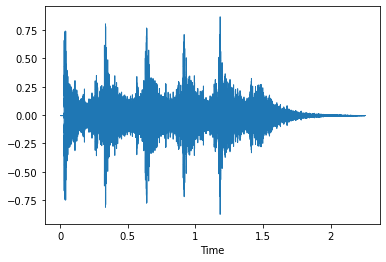

In [17]:
librosa.display.waveshow(audiodata, sr=sr)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

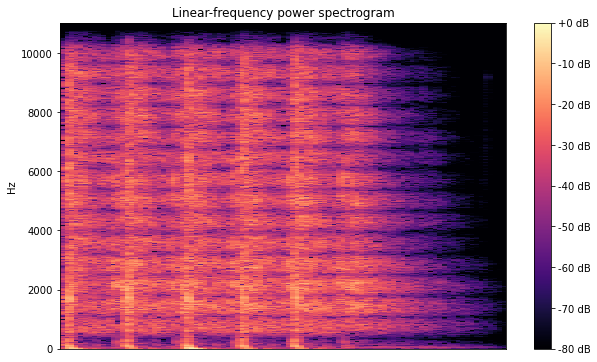

In [18]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(audiodata)), ref=np.max)
plt.figure(figsize=(10, 6))
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [19]:
audio_file_path ='C:/tmp/sound_datasets/urbansound8k/audio/fold2/4201-3-0-0.wav'

audiodata2,sr2=librosa.load(audio_file_path)

ipd.Audio(audio_file_path)



In [20]:
sr2

22050

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

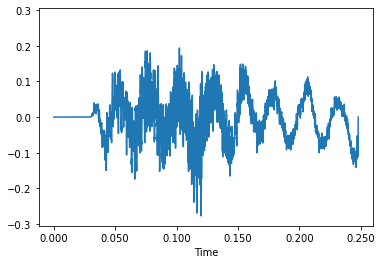

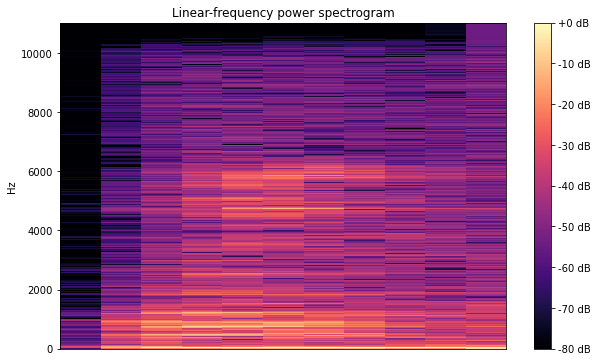

In [21]:
librosa.display.waveshow(audiodata2, sr=sr2)

D = librosa.amplitude_to_db(np.abs(librosa.stft(audiodata2)), ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

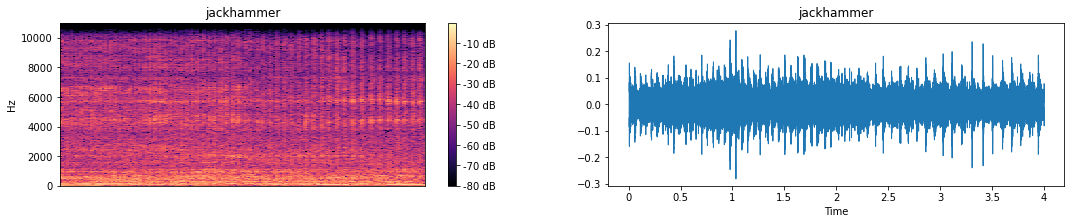

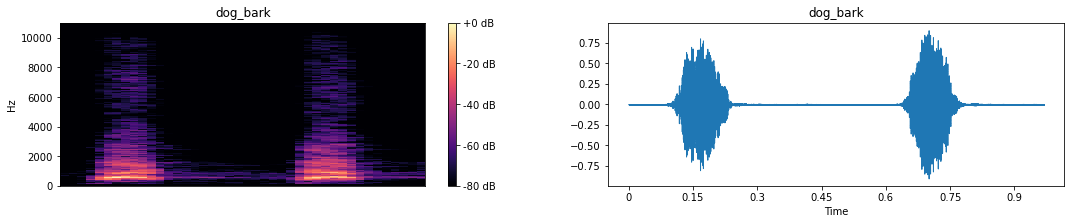

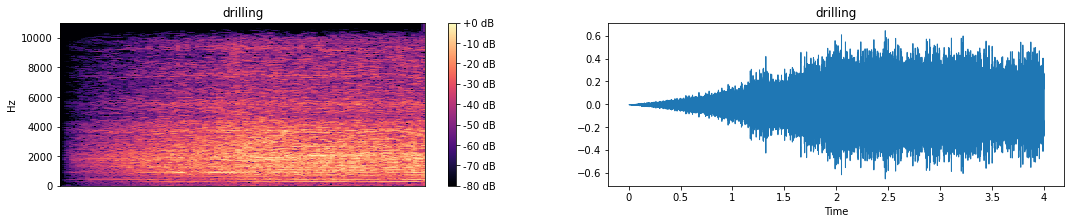

In [22]:
for i in range(192, 197, 2):
    audio_file_path = 'C:/tmp/sound_datasets/urbansound8k/audio/fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
    
    audiodata3, sr3 = librosa.load(audio_file_path)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audiodata3)), ref=np.max)
    
    plt.figure(figsize=(18, 3))
    
    plt.subplot(1, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(df["class"][i])
    
    plt.subplot(1, 2, 2)
    librosa.display.waveshow(audiodata3, sr=sr3)
    plt.title(df["class"][i])

### Verificação da existência de diferentes sample rates

In [23]:
sr_ = set()

from tqdm import tqdm #visualizar os loops

dir="C:/tmp/sound_datasets/urbansound8k/audio/"


for index,row in tqdm(df.iterrows()):
    audio_path=dir+'fold'+ str(row['fold']) + '/' + row['slice_file_name']
    audiodata, sr = librosa.load(audio_path)
    sr_.add(sr)
    
if len(sr_) > 1:
    print("Existem taxas de amostragem diferentes nos arquivos de áudio:")
    for sr in taxas_amostragem_encontradas:
        print(f"- {sr} Hz")
else:
    print("Todos os arquivos de áudio têm a mesma taxa de amostragem.")
    

8732it [15:59,  9.10it/s]

Todos os arquivos de áudio têm a mesma taxa de amostragem.


**Observações:** _Existem áudios com diferentes durações, pelo que iremos preencher os áudios mais curtos._ 

### Extração das Features


In [24]:
#data -> array, cada elemento do array representa 1 amostra do sinal do audio (amplitude num determinado tempo)
#sr-> numero de amostras por segundo
# 1 segundo - sr, entao total segundos - numero de amostras/sr => len(data)/sr

#preencher os audios mais curtos:
#calcular o tempo que falta ate aos 4 segundos. 1 segundo - sr, x segundos - x*sr => numero de amostras em falta
#(4segundo-tempo atual)*sr => numero de elementos em falta no array

def extracao_features(audio_file, target_duration):
    data, sr =librosa.load(audio_file, res_type='kaiser_fast')
    
    #uniforme duracao
    current_duration=len(data)/sr
    if current_duration < target_duration:
        #calcula nr de zeros
        zeros=int((target_duration - current_duration))*sr
        new_data=np.pad(data,(0,zeros),'constant')#adiciona x zeros no final array
    else: new_data=data
    
    mfccs_file=librosa.feature.mfcc(y=new_data, sr=sr,n_mfcc=40)
    return mfccs_file
    

_Correr o bloco de código seguinte apenas se for a primeira vez a extrair as features_

In [25]:
'''from tqdm import tqdm

dir="C:/tmp/sound_datasets/urbansound8k/audio/"
mfccs_audio_data=[]
duration=4.0

for index,row in tqdm(df.iterrows()):
    audio_path=dir+'fold'+ str(row['fold']) + '/' + row['slice_file_name']
    class_label = row['class']
    mfccs_audio = extracao_features(audio_path, duration)
    mfccs_audio = np.mean(mfccs_audio.T,axis=0)
    mfccs_audio_data.append([mfccs_audio, class_label])

df_features=pd.DataFrame(mfccs_audio_data, columns=['features','class'])
df_features.to_csv("./featuredf.csv")
'''

'from tqdm import tqdm\n\ndir="C:/tmp/sound_datasets/urbansound8k/audio/"\nmfccs_audio_data=[]\nduration=4.0\n\nfor index,row in tqdm(df.iterrows()):\n    audio_path=dir+\'fold\'+ str(row[\'fold\']) + \'/\' + row[\'slice_file_name\']\n    class_label = row[\'class\']\n    mfccs_audio = extracao_features(audio_path, duration)\n    mfccs_audio = np.mean(mfccs_audio.T,axis=0)\n    mfccs_audio_data.append([mfccs_audio, class_label])\n\ndf_features=pd.DataFrame(mfccs_audio_data, columns=[\'features\',\'class\'])\ndf_features.to_csv("./featuredf.csv")\n'

In [125]:
df_features=pd.read_csv("./featuredf.csv")

In [126]:
df_features

,Unnamed: 0,features,class
0,0,[-5.8550775e+02 7.4916563e+00 -1.3415623e+01 ...,dog_bark
1,1,[-4.2409818e+02 1.0934077e+02 -5.2919525e+01 ...,children_playing
2,2,[-4.5879114e+02 1.2138419e+02 -4.6520660e+01 ...,children_playing
3,3,[-413.89984 101.66373 -35.42945 5...,children_playing
4,4,[-4.4660352e+02 1.1368541e+02 -5.2402206e+01 ...,children_playing
...,...,...,...
8727,8727,[-3.9858450e+02 1.3553496e+02 -5.0725018e+01 ...,car_horn
8728,8728,[-4.9587540e+02 5.9848610e+01 -3.1213297e+01 ...,car_horn
8729,8729,[-3.0388824e+02 1.1135945e+02 -4.5941563e+01 ...,car_horn
8730,8730,[-4.8954172e+02 9.0761429e+01 -3.9332321e+01 ...,car_horn


In [127]:
df_features['features'] = df_features['features'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))

In [128]:
X=np.array(df_features['features'].tolist())
y = np.array(df_features['class'].tolist())

In [129]:
print(X.shape)

(8732, 40)


In [130]:
print(y.shape)

(8732,)


### Normalização dos Dados

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_nom = scaler.fit_transform(X)

In [132]:
features=pd.DataFrame(features_nom)
target=pd.DataFrame(y, columns = ['class'])

In [133]:
df2 = pd.concat([features, target], axis = 1)

In [134]:
df2

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,class
0,-1.974916,-1.863709,0.382633,-1.188652,0.643977,-1.124605,0.458024,-0.806025,0.922027,-0.878885,...,0.135742,0.292651,-0.066017,0.140228,-0.133992,0.445073,0.074132,0.275812,0.010295,dog_bark
1,-0.971123,0.070985,-0.913531,1.996188,0.792984,0.253775,0.703602,0.002329,0.711225,0.416075,...,0.444600,0.047155,-0.082903,0.342518,-0.055689,-0.235660,0.260281,0.135699,0.124085,children_playing
2,-1.186875,0.299758,-0.703578,1.572104,0.776616,0.708508,1.225000,-0.149765,0.787210,0.259045,...,-0.455506,-0.761507,-0.776052,-0.146324,-0.670478,-0.175522,0.673009,0.872329,-0.263295,children_playing
3,-0.907700,-0.074846,-0.339664,1.621339,0.877921,0.079933,0.764964,-0.279941,0.629789,0.132567,...,0.249083,0.533673,0.220251,-0.405644,0.377380,-0.166677,-0.233209,-0.374957,-0.327117,children_playing
4,-1.111082,0.153514,-0.896557,1.969244,0.961810,0.799648,0.759062,-0.049814,1.153216,0.191775,...,-0.457161,0.208332,0.466543,-0.333875,-0.014355,0.074914,0.673675,0.681626,0.013297,children_playing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,-0.812455,0.568561,-0.841527,0.798684,0.241035,0.095709,1.136420,0.561696,0.344187,-0.617167,...,0.644864,1.400362,0.825519,0.322402,0.521358,-1.205573,-1.778019,-0.495348,1.111699,car_horn
8728,-1.417500,-0.869153,-0.201327,0.783948,-0.716963,-1.180903,1.558327,-1.006818,-0.104970,0.657542,...,0.486527,0.322302,1.248287,1.379901,0.136083,-0.049792,0.606566,-0.168597,-0.554835,car_horn
8729,-0.223546,0.109331,-0.684577,0.799695,0.168364,-0.080567,0.753317,-0.064507,0.148276,-0.387506,...,-0.085077,1.372838,1.962040,1.444330,0.654413,-0.967298,-0.693713,1.207853,2.098067,car_horn
8730,-1.378111,-0.281942,-0.467721,0.283776,-0.166230,-0.606021,1.294885,-0.382965,0.235727,0.493819,...,0.393298,1.362420,1.227852,0.716208,0.670320,-0.764442,-1.401054,-0.070759,1.127675,car_horn


In [135]:
X = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values.reshape(-1,1)

In [136]:
X.shape

(8732, 40)

In [137]:
y.shape

(8732, 1)

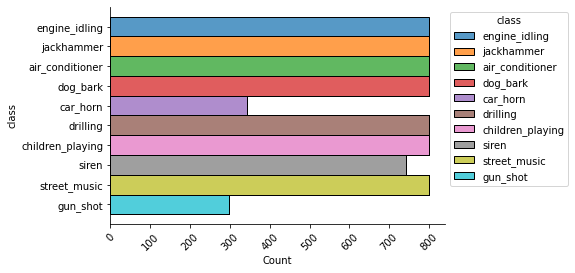

In [65]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
X2 = df2.drop('class', axis=1)  
y2 = df2['class']

#desbalanceamento
#statify para garantir as proporções
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42,stratify=y2)

df_train = pd.DataFrame(data=X_train, columns=df2.columns[:-1]) 


df_train['class'] = y_train

#gráfico
ax = sns.histplot(y='class', data=df_train, hue="class", multiple="stack")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
sns.despine()
plt.show()


In [66]:
#distribuição das classes
class_dict = y_train.value_counts(normalize=True)
print(class_dict)

engine_idling       0.114531
jackhammer          0.114531
air_conditioner     0.114531
dog_bark            0.114531
drilling            0.114531
children_playing    0.114531
street_music        0.114531
siren               0.106371
car_horn            0.049105
gun_shot            0.042806
Name: class, dtype: float64


### Oversampling duplicando classes até 1000

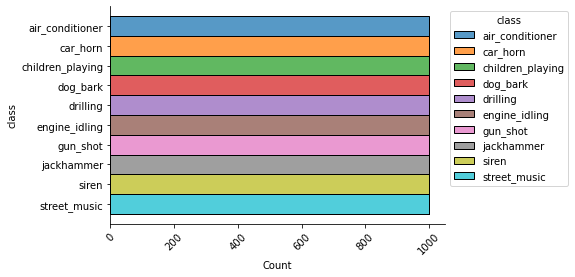

In [67]:
max_samples = 1000

# lista dados balanceados
balanced_dfs = []

# ver cada classe
for label, group in df2.groupby('class'):
    current_samples = len(group) # amostras da classe

    # numero de duplicadas para 1000 amostras
    duplications_needed = max_samples // current_samples

    # duplicar a classe
    balanced_dfs.append(pd.concat([group] * duplications_needed, ignore_index=True))

    # amostras extras se necessário
    remaining_samples = max_samples % current_samples
    if remaining_samples > 0:
        balanced_dfs.append(group.sample(remaining_samples, replace=True))

balanced_data = pd.concat(balanced_dfs, ignore_index=True)

#gráfico
ax = sns.histplot(y='class', data=balanced_data, hue="class", multiple="stack")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
sns.despine()
plt.show()

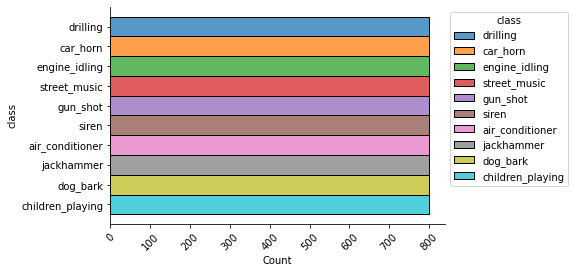

In [68]:
X3 = balanced_data.drop('class', axis=1)  
y3 = balanced_data['class']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X3, y3, test_size=0.2, random_state=42,stratify=y3)

df_train2 = pd.DataFrame(data=X_train2, columns=balanced_data.columns[:-1]) 


df_train2['class'] = y_train2

#gráfico
ax = sns.histplot(y='class', data=df_train2, hue="class", multiple="stack")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
sns.despine()
plt.show()

### Multilayer Percepton

Multilayer Percepton (MLP) é uma extensão das redes neuronais feedforward, composto por três tipos de camadas: input, hidden layer(s) e output. Na camada de input, o sinal a ser processado é recebido, enquanto a camada de output executa a tarefa desejada, como classificação (como o problema de urban sound) ou previsão. As hidden layers, localizadas entre o input e output, são o verdadeiro mecanismo de cálculo do MLP. Assim como em redes feedforward, os dados fluem do input para o output. O treino dos neurónios no MLP é realizado com o algoritmo de retropropagação (back propagation). Esta arquitetura é capaz de aproximar qualquer função contínua e resolver problemas não linearmente separáveis. O MLP é usado principalmente em problemas de classificação de padrões, reconhecimento, previsão e aproximação.

A obtenção de um desempenho ótimo num modelo MLP envolve a sintonia cuidadosa dos seus hiperparâmetros. Para facilitar este processo, utilizou-se a técnica da procura em grade (GridSearchCV), que explora diversas combinações de hiperparâmetros para identificar aquelas que maximizam o desempenho do modelo.

Inicialmente, tentou-se abordar a otimização de todos os hiperparâmetros simultaneamente, visando simplificar o processo e obter os melhores resultados possíveis. No entanto, esta estratégia não se tornou viável devido à considerável carga computacional envolvida. A tentativa de otimização conjunta resultou em tempos de execução prolongados e recursos computacionais substanciais, tornando-se impraticável.

Perante este cenário, a abordagem foi reconsiderada e optou-se por uma estratégia mais repartida. A segmentação dos conjuntos de hiperparâmetros, abordando cada um de forma isolada, revelou-se uma solução mais eficaz, diminuindo a carga computacional e acelerando significativamente o tempo de execução do processo de otimização.

Assim, os blocos de código seguintes utilizam a biblioteca scikit-learn para realizar essa pesquisa para um MLP. A estratégia envolve a avaliação de diferentes configurações para o número e tamanho de camadas ocultas (1); funções de ativação (2); otimizadores e necessidade de realizar _early stopping_ (3); regularização L2 e taxa de aprendizagem inicial (4); concluindo com número máximo de iterações e tamanho do lote (5).

#### 1. Escolha do numero de layers e neuronios por layer

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Parâmetros a testar
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
param_grid = {
    'hidden_layer_sizes': [
        (50,),                  # Uma camada com 50 neurônios
        (50, 30),               # Duas camadas: 50 neurônios na primeira, 30 na segunda
        (30, 20),               # Duas camadas: 30 neurônios na primeira, 20 na segunda
        (50, 50),               # Duas camadas: 50 neurônios em ambas as camadas
        (100, 50, 20),          # Três camadas: 100 neurônios na primeira, 50 na segunda, 20 na terceira
        (100, 100, 50, 20),     # Quatro camadas: 100 neurônios nas duas primeiras, 50 na terceira, 20 na quarta
    ],}

# Criar um modelo MLP
mlp = MLPClassifier(random_state=42)

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=10, scoring='accuracy')

# Realizar a procura por grade
grid_search.fit(X_train, y_train)

C:\Users\beatr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\beatr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\beatr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\beatr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\beatr\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\beatr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\beatr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\beatr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\beatr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10, estimator=MLPClassifier(random_state=42),
             param_grid={'hidden_layer_sizes': [(50,), (50, 30), (30, 20),
                                                (50, 50), (100, 50, 20),
                                                (100, 100, 50, 20)]},
             scoring='accuracy')

In [38]:
# Obter o melhor numero de camadas e neuróneos por camada
melhor_camada= grid_search.best_params_
print(f'Melhor camada: {melhor_camada}')

Melhor camada: {'hidden_layer_sizes': (100, 100, 50, 20)}


#### 2. Escolha da função de ativação

In [90]:
# Parâmetros a testar
param_grid = {
    'hidden_layer_sizes': [melhor_camada['hidden_layer_sizes'],], # Melhor camada encontrada anteriormente
    'activation': ['relu', 'tanh', 'logistic', 'identity'], # funções de ativação
}

# Criar um modelo MLP
mlp = MLPClassifier(random_state=42)

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=10, scoring='accuracy')

# Realizar a procura por grade
grid_search.fit(X_train, y_train)

C:\Users\maria\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maria\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maria\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maria\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maria\anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['relu', 'tanh', 'logistic', 'identity'],
                         'hidden_layer_sizes': [(100, 50, 20)]},
             scoring='accuracy')

In [91]:
# Obter a melhor função de ativação
melhor_ativacao = grid_search.best_params_['activation']
print(f'Melhor função de ativação: {melhor_ativacao}')

Melhor função de ativação: tanh


#### 3. Escolha dos otimizadores, com/sem early stopping

In [94]:
# Parâmetros a testar
param_grid = {
    'hidden_layer_sizes': [melhor_camada['hidden_layer_sizes'],], # Melhor camada encontrada anteriormente
    'activation': [melhor_ativacao], # funções de ativação
    'solver': ['lbfgs', 'sgd', 'adam'],  # Otimizadores
    'early_stopping': [True, False],  # Early stopping
}

# Criar um modelo MLP
mlp = MLPClassifier(random_state=42)

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=10, scoring='accuracy')

# Realizar a procura por grade
grid_search.fit(X_train, y_train)

C:\Users\maria\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maria\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maria\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maria\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maria\anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['tanh'],
                         'early_stopping': [True, False],
                         'hidden_layer_sizes': [(100, 50, 20)],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy')

In [103]:
# Obter o melhor otimizador 
melhor_otimizador = grid_search.best_params_['solver']
print(f'Melhor otimizador: {melhor_otimizador}')

# Com ou sem early stoping?
early_stop = grid_search.best_params_['early_stopping']
print(f'Usar early stopping?: {early_stop}')

Melhor otimizador: adam
Usar early stopping?: False


#### 4. Escolha da Regularização e taxa de aprendizagem inicial

In [97]:
# Parâmetros a testar
param_grid = {
    'hidden_layer_sizes': [melhor_camada['hidden_layer_sizes'],], # Melhor camada encontrada anteriormente
    'activation': [melhor_ativacao], # funções de ativação
    'solver': [melhor_otimizador],  # Otimizadores
    'early_stopping': [early_stop],  # Early stopping
    'alpha': [0.0001, 0.001, 0.01],  # Regularização L2
    'learning_rate_init': [0.001, 0.01, 0.1],  # Taxa de aprendizagem inicial
}

# Criar um modelo MLP
mlp = MLPClassifier(random_state=42)

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=10, scoring='accuracy')

# Realizar a procura por grade
grid_search.fit(X_train, y_train)

C:\Users\maria\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maria\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maria\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maria\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maria\anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['tanh'], 'alpha': [0.0001, 0.001, 0.01],
                         'early_stopping': [False],
                         'hidden_layer_sizes': [(100, 50, 20)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'solver': ['adam']},
             scoring='accuracy')

In [98]:
# Obter melhor regularização 
melhor_alpha = grid_search.best_params_['alpha']
print(f'Melhor alpha: {melhor_alpha}')

# Com ou sem early stoping?
melhor_taxa = grid_search.best_params_['learning_rate_init']
print(f'Melhor taxa de aprendizagem: {melhor_taxa}')

Melhor alpha: 0.01
Melhor taxa de aprendizagem: 0.001


#### 5. Escolha do numero máximo de iterações e tamanho do lote

In [99]:
# Parâmetros a testar
param_grid = {
    'hidden_layer_sizes': [melhor_camada['hidden_layer_sizes'],], # Melhor camada encontrada anteriormente
    'activation': [melhor_ativacao], # funções de ativação
    'solver': [melhor_otimizador],  # Otimizadores
    'early_stopping': [early_stop],  # Early stopping
    'alpha': [melhor_alpha],  # Regularização L2
    'learning_rate_init': [melhor_taxa],  # Taxa de aprendizagem inicial
    'max_iter': [500, 1000, 1500],
    'batch_size': [32, 64, 128],  # Tamanho do lote
}

# Criar um modelo MLP
mlp = MLPClassifier(random_state=42)

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=10, scoring='accuracy')

# Realizar a procura por grade
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['tanh'], 'alpha': [0.01],
                         'batch_size': [32, 64, 128], 'early_stopping': [False],
                         'hidden_layer_sizes': [(100, 50, 20)],
                         'learning_rate_init': [0.001],
                         'max_iter': [500, 1000, 1500], 'solver': ['adam']},
             scoring='accuracy')

In [101]:
# Obter melhor numero maximo de iterações
melhor_iter = grid_search.best_params_['max_iter']
print(f'Melhor número máximo de iterações: {melhor_iter}')

# Com ou sem early stoping?
melhor_tamanho_lote = grid_search.best_params_['batch_size']
print(f'Melhor tamanho do lote: {melhor_tamanho_lote}')

Melhor número máximo de iterações: 500
Melhor tamanho do lote: 32


### Resultados com os melhores parâmetros

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Obter os melhores parametros gerais
melhores_parametros= grid_search.best_params_
print(f'Melhores parametros: {melhores_parametros}')

# Avaliar o modelo com os melhores parâmetros usando 10-fold cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=10)
print(f'Accuracy média na cross-validation com 10 folds: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}')

# Avaliar o modelo final no conjunto de teste
y_pred_test = grid_search.best_estimator_.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

print(f'Accuracy no conjunto de teste: {accuracy_test:.2f}')
print('Matriz de Confusão no conjunto de teste:')
print(conf_matrix_test)
print('Relatório de Classificação no conjunto de teste:')
print(class_report_test)

Melhores parametros: {'activation': 'tanh', 'alpha': 0.01, 'batch_size': 32, 'early_stopping': False, 'hidden_layer_sizes': (100, 50, 20), 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam'}
Accuracy média na cross-validation com 10 folds: 0.92 ± 0.01
Accuracy no conjunto de teste: 0.93
Matriz de Confusão no conjunto de teste:
[[201   1   0   1   0   2   0   0   0   3]
 [  0 200   0   2   0   0   0   0   0   0]
 [  0   0 165  11   2   0   1   1   3   9]
 [  1   3   8 165   3   2   8   0   5   6]
 [  0   0   1   3 188   1   1  11   1   3]
 [  0   0   1   1   1 182   0   1   0   0]
 [  0   0   2   0   3   0 206   0   0   0]
 [  0   0   0   0   5   1   0 195   0   3]
 [  0   0   5   3   1   1   0   1 201   0]
 [  4   1   8   4   3   3   0   1   1 150]]
Relatório de Classificação no conjunto de teste:
                  precision    recall  f1-score   support

 air_conditioner       0.98      0.97      0.97       208
        car_horn       0.98      0.99      0.98       202
chil

In [ ]:
## CNN1D

In [138]:
X.shape


(8732, 40)

In [139]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = to_categorical(y_encoded)


C:\Users\beatr\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [140]:
y.shape

(8732, 10)

In [110]:
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [111]:
print(X_train4.shape, y_train4.shape)
print(X_test4.shape, y_test4.shape)

(6985, 40) (6985, 10)
(1747, 40) (1747, 10)


In [112]:
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
# from keras.regularizers import l2

# # dimensoes entrada
# input_shape = (40, 1)

# # modelo
# model = Sequential()

# # ativacao ReLU
# model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=input_shape))
# # para reduzir a dimensionalidade
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.2))

# # segunda camada
# model.add(Conv1D(256, kernel_size=3, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.2))

# # formato para a camada densa
# model.add(Flatten())

# # 1camada densa regularizacao l2
# model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.0001)))
# # Dropout
# model.add(Dropout(0.2))

# # 2 camada densa 
# model.add(Dense(128, activation='relu'))
# # Dropout
# model.add(Dropout(0.2))

# # 3 camada densa com mais neurônios
# model.add(Dense(64, activation='relu'))
# # Dropout
# model.add(Dropout(0.2))


# # camada densa final com ativacao softmax -> multiclasse
# model.add(Dense(10, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision'])
# #hist=model.fit(X_train4.reshape(X_train4.shape[0], X_train4.shape[1], 1), y_train4, epochs=50, batch_size=32, validation_data=(X_test4.reshape(X_test4.shape[0], X_test4.shape[1], 1), y_test4))


In [143]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.regularizers import l2

def cnn1d():
    # dimensoes entrada
    input_shape = (40, 1)

    # modelo
    model = Sequential()

    # ativacao ReLU
    model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=input_shape))
    # para reduzir a dimensionalidade
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    # segunda camada
    model.add(Conv1D(256, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    # formato para a camada densa
    model.add(Flatten())

    # 1camada densa regularizacao l2
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.0001)))
    # Dropout
    model.add(Dropout(0.2))

    # 2 camada densa 
    model.add(Dense(128, activation='relu'))
    # Dropout
    model.add(Dropout(0.2))

    # 3 camada densa com mais neurônios
    model.add(Dense(64, activation='relu'))
    # Dropout
    model.add(Dropout(0.2))

    # camada densa final com ativacao softmax -> multiclasse
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision'])
    
    return model


In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

all_accuracies = []
all_confusion_matrices = []

# Iterar sobre as dobras e treinar/avaliar o modelo
for train_idx, val_idx in kfold.split(X, np.argmax(y, axis=1)):
    x_train_fold, y_train_fold = X[train_idx], y[train_idx]
    x_val_fold, y_val_fold = X[val_idx], y[val_idx]

    # Criar um novo modelo usando a função cnn1d
    model = cnn1d()

    # Treinar o modelo
    history = model.fit(x_train_fold.reshape(x_train_fold.shape[0], x_train_fold.shape[1], 1), y_train_fold, epochs=50, batch_size=32, validation_data=(x_val_fold.reshape(x_val_fold.shape[0], x_val_fold.shape[1], 1), y_val_fold))

    # Avaliar o modelo na parte de validação
    y_pred_prob = model.predict(x_val_fold.reshape(x_val_fold.shape[0], x_val_fold.shape[1], 1))
    y_pred = np.argmax(y_pred_prob, axis=1)

    accuracy = accuracy_score(np.argmax(y_val_fold, axis=1), y_pred)
    all_accuracies.append(accuracy)

    # Calcular a matriz de confusão
    cm = confusion_matrix(np.argmax(y_val_fold, axis=1), y_pred)
    all_confusion_matrices.append(cm)

# Calcular e exibir métricas de desempenho médio
mean_accuracy = np.mean(all_accuracies)
std_accuracy = np.std(all_accuracies)

print(f'Média da acurácia: {mean_accuracy}')
print(f'Desvio padrão da acurácia: {std_accuracy}')

Epoch 1/50
246/246 [==============================] - 7s 20ms/step - loss: 1.7807 - accuracy: 0.3694 - precision: 0.6805 - val_loss: 1.2308 - val_accuracy: 0.5698 - val_precision: 0.7470
Epoch 2/50
246/246 [==============================] - 5s 20ms/step - loss: 1.2169 - accuracy: 0.5856 - precision: 0.7644 - val_loss: 0.8804 - val_accuracy: 0.7185 - val_precision: 0.8641
Epoch 3/50
246/246 [==============================] - 5s 20ms/step - loss: 0.9561 - accuracy: 0.6897 - precision: 0.8117 - val_loss: 0.7114 - val_accuracy: 0.7826 - val_precision: 0.8870
Epoch 4/50
246/246 [==============================] - 4s 17ms/step - loss: 0.7695 - accuracy: 0.7567 - precision: 0.8402 - val_loss: 0.5696 - val_accuracy: 0.8284 - val_precision: 0.8921
Epoch 5/50
246/246 [==============================] - 4s 17ms/step - loss: 0.6596 - accuracy: 0.7983 - precision: 0.8668 - val_loss: 0.5127 - val_accuracy: 0.8524 - val_precision: 0.9026
Epoch 6/50
246/246 [==============================] - 4s 18ms/ste

Epoch 45/50
 99/246 [===========>..................] - ETA: 2s - loss: 0.2194 - accuracy: 0.9741 - precision: 0.9781

Média da acurácia: 0.9599235092293125
Desvio padrão da acurácia: 0.022024210406371154


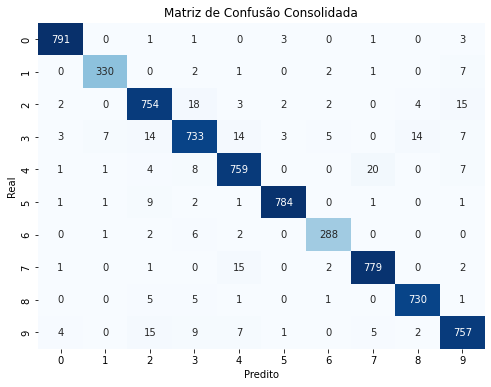

In [99]:
# Calcular e exibir métricas de desempenho médio
mean_accuracy = np.mean(all_accuracies)
std_accuracy = np.std(all_accuracies)

print(f'Média da accuracy: {mean_accuracy}')
print(f'Desvio padrão da accuracy: {std_accuracy}')

# Calcular a matriz de confusão consolidada
consolidated_cm = np.sum(all_confusion_matrices, axis=0)

# Exibir a matriz de confusão consolidada
plt.figure(figsize=(8, 6))
sns.heatmap(consolidated_cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão Consolidada')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

In [101]:
# Avalia a acurácia e a precisão no conjunto de treinamento
train_metrics = model.evaluate(X_train4.reshape(X_train4.shape[0], X_train4.shape[1], 1), y_train4)
train_accuracy = train_metrics[1]
train_precision = train_metrics[2]
print(f'Accuracy no conjunto de treinamento: {train_accuracy}')
print(f'Precisão no conjunto de treinamento: {train_precision}')

# Avalia a acurácia e a precisão no conjunto de teste
test_metrics = model.evaluate(X_test4.reshape(X_test4.shape[0], X_test4.shape[1], 1), y_test4)
test_accuracy = test_metrics[1]
test_precision = test_metrics[2]
print(f'Accuracy no conjunto de teste: {test_accuracy}')
print(f'Precisão no conjunto de teste: {test_precision}')

219/219 [==============================] - 1s 3ms/step - loss: 0.1296 - accuracy: 0.9967 - precision: 0.9968
Accuracy no conjunto de treinamento: 0.9967072010040283
Precisão no conjunto de treinamento: 0.9968490600585938
55/55 [==============================] - 0s 3ms/step - loss: 0.5919 - accuracy: 0.9124 - precision: 0.9174
Accuracy no conjunto de teste: 0.9124212861061096
Precisão no conjunto de teste: 0.9173887968063354


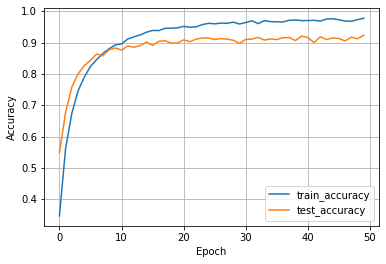

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
metrics = hist.history

plt.plot(metrics['accuracy'], label='train_accuracy')
plt.plot(metrics['val_accuracy'], label='test_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend()
plt.grid(True)
plt.savefig("accuracy")
plt.show()

In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
